# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 12. Data Wrangling (part 3)

### Date: October 3, 2023

### To-Dos From Last Class:

* Download <a href="https://github.com/hogeveen-lab/DSPN_Fall2023_Git/tree/main/assignment_starters/assign3_starter">Assignment #3 starter kit</a>

### Today:

* Wrangle some real data

### Homework
* Submit Assignment #3: <a href="https://www.dropbox.com/request/ggV5rAg3J9T0YxpEHLqX">Data Wrangling</a> (before 10/10, 23:00 MDT)

# Importing packages

In [63]:
### Part 1 --> Importing data wrangling packages I often use
import os
from glob import glob # only need the glob subpackage from glob
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

# Setting up the filepaths

In [67]:
### Part 2 --> setting paths to the first level data

# get current working directory
base_dir = os.getcwd()

# Go above current working directory and
first_dir = os.path.join(base_dir,'misc/imitation_inhibition_paradigm/data/first')
P_file_pattern = 'P*.txt'
second_dir = os.path.join(base_dir,'misc/imitation_inhibition_paradigm/data/second')
questionnaire_file = os.path.join(second_dir,'ait_questionnaires.csv')

# Using glob to find all participant data files
all_files = glob(os.path.join(first_dir,P_file_pattern))
print(all_files)

['/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/imitation_inhibition_paradigm/data/first/P8.txt', '/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/imitation_inhibition_paradigm/data/first/P9.txt', '/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/imitation_inhibition_paradigm/data/first/P49.txt', '/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/imitation_inhibition_paradigm/data/first/P48.txt', '/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/imitation_inhibition_paradigm/data/first/P13.txt', '/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/imitation_inhibition_paradigm/data/first/P12.txt', '/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/imitation_inhibition_paradigm/data/first/P38.txt', '/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450

# Loading in a test subject to make sense of things

In [59]:
# load in an individual subject file
df_test = pd.read_csv(all_files[0],error_bad_lines=False,skiprows=5,sep='\t')
# subset to only experimental rows
df_test = df_test[df_test['Name.1']=='AI_Block']
# subset to only key releases
df_test = df_test[df_test['Released']=='Released']

# How many key realeases do we actually have?
print('How many rows in key release filtered data frame:',len(df_test))

# identify double responses
df_test['shift'] = df_test['Name.2'].shift()
df_test['double_response'] = np.where(df_test['Name.2']==df_test['shift'],1,0)
df_test = df_test[df_test['double_response']!=1]
print('How many rows in key release filtered data frame, after removing double responses?:',len(df_test))

How many rows in key release filtered data frame: 101
How many rows in key release filtered data frame, after removing double responses?: 100


# Iterating through to get all first level data, concatenating into a single data frame

In [69]:
# declare an empty list of data frame
dfs_list = []

# iterate through the files
for cur_file in all_files:
    # load in an individual subject file
    df_tmp = pd.read_csv(cur_file,error_bad_lines=False,skiprows=5,sep='\t')
    # subset to only experimental rows
    df_tmp = df_tmp[df_tmp['Name.1']=='AI_Block']
    # subset to only key releases
    df_tmp = df_tmp[df_tmp['Released']=='Released']
    # identify double responses
    df_tmp['shift'] = df_tmp['Name.2'].shift()
    df_tmp['double_response'] = np.where(df_tmp['Name.2']==df_tmp['shift'],1,0)
    df_tmp = df_tmp[df_tmp['double_response']!=1]
    # append to list of data frames
    dfs_list.append(df_tmp)

df_allsubjects = pd.concat(dfs_list,axis=0)
display(df_allsubjects)

,Group,Name,Name.1,Name.2,Name.3,Response,Key,Released,Response.1,Code,Time,(Trial Variable),Finger,Congruence,Repeated,Correct,shift,double_response
49,Main Group,P8,AI_Block,"AI_Trial, 7","AI_Blue (7, i5inc.bmp)",index,v,Released,(based on code value),C,756,NaN,1,4,1,NaN,NaN,0
54,Main Group,P8,AI_Block,"AI_Trial, 10","AI_Blue (10, m5base.bmp)",middle,b,Released,(based on code value),C,663,NaN,2,0,1,NaN,"AI_Trial, 7",0
58,Main Group,P8,AI_Block,"AI_Trial, 5","AI_Final_Stage (5, i4con.bmp)",index,v,Released,(based on code value),C,532,NaN,1,3,1,NaN,"AI_Trial, 10",0
63,Main Group,P8,AI_Block,"AI_Trial, 9","AI_Blue (9, i5base.bmp)",index,v,Released,(based on code value),C,616,NaN,1,0,1,NaN,"AI_Trial, 5",0
67,Main Group,P8,AI_Block,"AI_Trial, 3","AI_Final_Stage (3, i4baseinc.bmp)",index,v,Released,(based on code value),C,536,NaN,1,2,1,NaN,"AI_Trial, 9",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Main Group,P41,AI_Block,"AI_Trial, 4","AI_Final_Stage (4, m4baseinc.bmp)",index,v,Released,(based on code value),E,513,NaN,2,2,10,NaN,"AI_Trial, 1",0
473,Main Group,P41,AI_Block,"AI_Trial, 8","AI_Final_Stage (8, m4inc.bmp)",middle,b,Released,(based on code value),C,517,NaN,2,4,10,NaN,"AI_Trial, 4",0
477,Main Group,P41,AI_Block,"AI_Trial, 5","AI_Final_Stage (5, i4con.bmp)",index,v,Released,(based on code value),C,355,NaN,1,3,10,NaN,"AI_Trial, 8",0
481,Main Group,P41,AI_Block,"AI_Trial, 6","AI_Final_Stage (6, m4con.bmp)",middle,b,Released,(based on code value),C,440,NaN,2,3,10,NaN,"AI_Trial, 5",0


# Loading in the questionnaire data and merging it with behavioral data

In [72]:
# reading in questionnaire responses
questionnaire_file = os.path.join(second_dir,'ait_questionnaires.csv')
df_questionnaire = pd.read_csv(questionnaire_file)
# display(df_questionnaire)

# merge questionnaires with trial-level data
df_allsubjects = df_allsubjects.rename(columns={"Name": "pid"})
df_allsubjects = pd.merge(df_allsubjects,df_questionnaire,on="pid",how="outer")

# Writing the observation-level data to a big csv

In [73]:
out_filename = os.path.join(second_dir,'ait_trialwise.csv')
df_allsubjects.to_csv(out_filename,index=False)

## Quick tangent: Automatic Imitation Task

<img src="img/ait_task.png" width="600">

* __MAIN OUTCOME: HOW DO THE DIFFERENT CONGRUENT VS. INCONGRUENT CONDIS SLOW YOUR RESPONSE TIME?__

# Computing SECOND-level summary measures (mean RT by pid)

In [76]:
opt1 = df_allsubjects.groupby('pid').mean('Time')

display(opt1)

,Time,(Trial Variable),Finger,Congruence,Repeated,Correct,double_response,questionnaire_1,questionnaire_2,questionnaire_3,questionnaire_4,questionnaire_5,questionnaire_6,questionnaire_7,questionnaire_8,questionnaire_9,questionnaire_10
pid,,,,,,,,,,,,,,,,,
P1,563.489796,NaN,1.500000,2.061224,5.510204,NaN,0.0,63.0,11.0,45.0,37.0,18.0,42.0,83.0,22.0,80.0,14.0
P10,614.760000,NaN,1.500000,2.000000,5.500000,NaN,0.0,21.0,76.0,76.0,70.0,14.0,81.0,44.0,57.0,31.0,29.0
P11,479.717172,NaN,1.494949,2.010101,5.464646,NaN,0.0,22.0,20.0,92.0,57.0,36.0,34.0,90.0,30.0,72.0,57.0
P12,589.806122,NaN,1.489796,2.020408,5.510204,NaN,0.0,57.0,54.0,25.0,76.0,54.0,50.0,2.0,92.0,43.0,83.0
P13,690.806122,NaN,1.500000,1.989796,5.469388,NaN,0.0,60.0,69.0,15.0,62.0,88.0,29.0,37.0,74.0,7.0,40.0
P14,488.313131,NaN,1.494949,1.979798,5.454545,NaN,0.0,85.0,20.0,35.0,78.0,94.0,25.0,72.0,47.0,1.0,19.0
P15,497.775510,NaN,1.500000,2.000000,5.500000,NaN,0.0,71.0,75.0,19.0,59.0,15.0,36.0,20.0,2.0,24.0,37.0
P16,413.051020,NaN,1.500000,2.000000,5.459184,NaN,0.0,30.0,50.0,5.0,51.0,76.0,78.0,54.0,29.0,50.0,25.0
P17,562.622449,NaN,1.510204,1.989796,5.438776,NaN,0.0,51.0,55.0,95.0,81.0,92.0,89.0,92.0,83.0,81.0,8.0


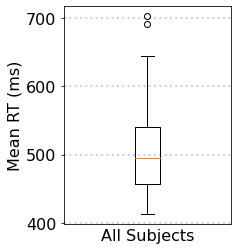

In [84]:
opt1 = df_allsubjects.groupby('pid').mean('Time')

opt2 = df_allsubjects.groupby('pid')['Time'].mean()
# display(opt2)

plt.boxplot(opt2)
plt.xlabel('All Subjects')
plt.xticks([])
plt.ylabel('Mean RT (ms)')
plt.grid(b=True,color='blue',alpha=0.2,linestyle=':',linewidth=2)
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [3,4]
plt.show()


# Computing subject-level summary measures (mean RT by pid by condition)

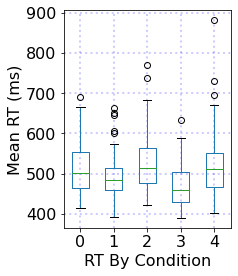

In [94]:
rt_by_condition = df_allsubjects.groupby(['pid','Congruence'])['Time'].mean().unstack()
rt_by_condition.boxplot()
plt.xlabel('RT By Condition')
plt.ylabel('Mean RT (ms)')
plt.grid(b=True,color='blue',alpha=0.2,linestyle=':',linewidth=2)
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [3,4]
plt.show()

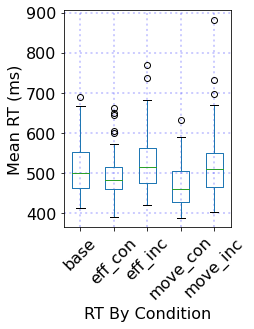

In [97]:
df_allsubjects['string_condi'] = np.where(df_allsubjects.Congruence==0,'base',
                                          np.where(df_allsubjects.Congruence==1,'eff_con',
                                                   np.where(df_allsubjects.Congruence==2,'eff_inc',
                                                            np.where(df_allsubjects.Congruence==3,'move_con',
                                                                     'move_inc'))))

rt_by_stringcondi = df_allsubjects.groupby(['pid','string_condi'])['Time'].mean().unstack()
rt_by_stringcondi.boxplot()
plt.xticks(rotation = 45)
plt.xlabel('RT By Condition')
plt.ylabel('Mean RT (ms)')
plt.grid(b=True,color='blue',alpha=0.2,linestyle=':',linewidth=2)
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [3,4]
plt.show()

# Writing the subject-level RT data to a CSV

In [98]:
# Writing the data to a second-level data frame that we will eventually play with in R
subj_out_filename = os.path.join(second_dir,'ait_subjectlevel.csv')
rt_by_stringcondi.to_csv(subj_out_filename,index=True)

# Introducing Assignment #3

* <a href="https://github.com/hogeveen-lab/DSPN_Fall2023_Git/tree/main/assignment_starters/assign3_starter">Assignment #3</a>